# Trabalhando com imagens

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets

ds_or = datasets.MNIST("../dataset/", train=True, download=True)
img, target = ds_or[0]
print(img)
print(target)

<PIL.Image.Image image mode=L size=28x28 at 0x7F5C98FF1850>
5


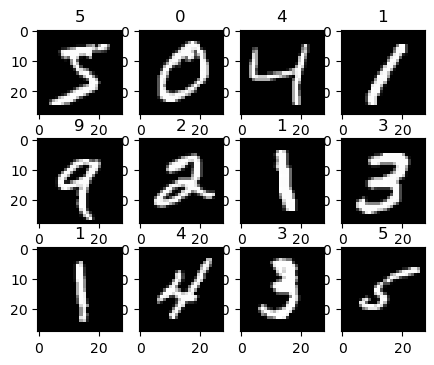

In [2]:
fig, axs = plt.subplots(3, 4, figsize=(5, 4))
axs = axs.reshape(-1)
for idx in range(len(axs)):
    img, target = ds_or[idx]
    axs[idx].imshow(img, 'gray')
    axs[idx].set_title(target)

In [3]:
class Subset(Dataset):
    def __init__(self, ds, indices):
        self.ds = ds
        self.indices = indices

    def __getitem__(self, idx):
        return self.ds[self.indices[idx]]
    
    def __len__(self):
        return len(self.indices)
    
indices = random.sample(range(len(ds_or)), k=1000)
ds = Subset(ds_or, indices)
ds[0]

(<PIL.Image.Image image mode=L size=28x28>, 1)

In [4]:
img, target = ds[0]
np.array(img).mean()

23.070153061224488

In [5]:
def get_statistic(ds):
    n = len(ds)
    mean = 0.
    std = 0.
    for img, target in ds:
        img_np = np.array(img)
        mean += np.mean(img_np)
        std += np.std(img_np)
    mean /= n
    std /= n

    return mean, std


print(get_statistic(ds))

(33.50557908163263, 77.01277727364929)


In [6]:
def transform(img, mean = 33., std =76.5):

    #convertendo PIL->Torch
    img = np.array(img, dtype=np.float32)
    img = torch.from_numpy(img)

    # Normalização
    img = (img-mean)/std

    # Adiciona a dimensão do canal
    img = img.reshape(1, img.shape[0], img.shape[1])

    return img

img_t = transform(img)
print(img_t.mean(), img_t.std())

tensor(-0.1298) tensor(0.8940)
